# 0 - PRELIMINARIES

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

%matplotlib inline

### Acquire

In [3]:
#commenting this out to avoid rerunning when executing whole ntbk.
# !curl -o http://www.hosonline.org/surveys/hos/download/C16B_PUF.zip
# !unzip ../source_data/C16B_PUF.zip -d ../source_data

!head -n 1 ../source_data/C16B_PUF.TXT

Each line is a string of length 105 (spaces represent missing data).  We need to parse each of the 83 fields from this string for each beneficiary record.  Afterwards, we'll save as csv to make i/o to pandas simpler in the future.

In [4]:
#Parsed in accordance with HOS C16 PUF Data User Guide Field Positions available at: http://www.hosonline.org/surveys/hos/download/HOS_DUG_QIO_C16B.pdf
import csv

with open('../source_data/C16B_PUF.TXT') as txt_file:
    records = txt_file.readlines()
    to_comma_delimited = lambda line: [line[0:9]] + list(line[9:38]) + [line[38:40]] + [line[40:42]] + [line[42:44]] + list(line[44:71]) + [line[71:73]]+ list(line[73:89]) + [line[89:92]] + [line[92:94]] + [line[94:99]] + [line[99:102]] + [line[102:104]] + [line[104]]
    transformed_records = [to_comma_delimited(line) for line in records]
    with open('../source_data/C16B_PUF.csv', 'wb') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerows(transformed_records)

Let's verify this worked.

In [5]:
!head -n 1 ../source_data/C16B_PUF.csv

Good.  So let's read it into pandas so we can begin our data inspection.

In [6]:
columns = [u'ID', u'AGEGRP', u'RACE', u'GENDER', u'MRSTAT', u'EDUC', u'BMI', u'GENHTH', u'MODACT', u'CLMBSV', u'PACMPL', u'PLMTKW', u'EACMPL', u'ENTCRF', u'PNINTF', u'PCEFUL', u'ENERGY', u'BLSAD', u'SCLACT', u'ASHLTH', u'ASEHLTH', u'DIFBTH', u'DIFDRS', u'DIFEAT', u'DIFCHR', u'DIFWLK', u'DIFTOL', u'DIFPRM', u'DIFMON', u'DIFMED', u'PHYHTH', u'MENHTH', u'PORHTH', u'BLIND', u'DEAF', u'DIFCON', u'DIFERR', u'MEMINT', u'HIGHBP', u'ANGCAD', u'CHF', u'AMI', u'OTHHRT', u'STROKE', u'COPD_E', u'GI_ETC', u'ATHHIP', u'ATHHAN', u'OSTEOPO', u'SCIATC', u'DIABET', u'DEPRES', u'ANYCAN', u'COLNCA', u'LUNGCA', u'BRSTCA', u'PROSCA', u'OTHCAN', u'PNIACT', u'PNISOC', u'AVGPN', u'FELTNP', u'FELTSD', u'CMPHTH', u'SMKFRQ', u'URNLKG', u'URNMAG', u'URNDOC', u'URNTRT', u'PAOTLK', u'PAOADV', u'BALTLK', u'FELL12MO', u'BAL12MO', u'FALLTLK', u'OSTTEST', u'WHOCMP', u'SRVDSP', u'RNDNUM', u'PCTCMP', u'COHORT', u'PLREG', u'SVLANG']
data = pd.read_csv('../source_data/C16B_PUF.csv', names=columns, na_values=' ')

# 1 - DATA INSPECTION

The data comes from an HOS Outcomes Survey from 2012. 

In [7]:
#TODO #graphic of data dictionary - pre clean

In [8]:
#TODO #graphic of data dictionary - post clean

###Examine

In [9]:
data.columns

Index([u'ID', u'AGEGRP', u'RACE', u'GENDER', u'MRSTAT', u'EDUC', u'BMI', u'GENHTH', u'MODACT', u'CLMBSV', u'PACMPL', u'PLMTKW', u'EACMPL', u'ENTCRF', u'PNINTF', u'PCEFUL', u'ENERGY', u'BLSAD', u'SCLACT', u'ASHLTH', u'ASEHLTH', u'DIFBTH', u'DIFDRS', u'DIFEAT', u'DIFCHR', u'DIFWLK', u'DIFTOL', u'DIFPRM', u'DIFMON', u'DIFMED', u'PHYHTH', u'MENHTH', u'PORHTH', u'BLIND', u'DEAF', u'DIFCON', u'DIFERR', u'MEMINT', u'HIGHBP', u'ANGCAD', u'CHF', u'AMI', u'OTHHRT', u'STROKE', u'COPD_E', u'GI_ETC', u'ATHHIP', u'ATHHAN', u'OSTEOPO', u'SCIATC', u'DIABET', u'DEPRES', u'ANYCAN', u'COLNCA', u'LUNGCA', u'BRSTCA', u'PROSCA', u'OTHCAN', u'PNIACT', u'PNISOC', u'AVGPN', u'FELTNP', u'FELTSD', u'CMPHTH', u'SMKFRQ', u'URNLKG', u'URNMAG', u'URNDOC', u'URNTRT', u'PAOTLK', u'PAOADV', u'BALTLK', u'FELL12MO', u'BAL12MO', u'FALLTLK', u'OSTTEST', u'WHOCMP', u'SRVDSP', u'RNDNUM', u'PCTCMP', u'COHORT', u'PLREG', u'SVLANG'], dtype='object')

In [10]:
data.head()

,ID,AGEGRP,RACE,GENDER,MRSTAT,EDUC,BMI,GENHTH,MODACT,CLMBSV,...,BAL12MO,FALLTLK,OSTTEST,WHOCMP,SRVDSP,RNDNUM,PCTCMP,COHORT,PLREG,SVLANG
0,C01000060,3,NaN,2,1,1,1,4,1,1,...,1,1,1,1,M10,M1,97.3,C16,8,1
1,C01000361,3,1,1,1,2,1,3,2,3,...,2,2,2,1,T10,T1,98.7,C16,9,1
2,C01000455,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,T31,T3,1.3,C16,10,1
3,C01000542,3,1,2,2,3,2,3,1,1,...,1,1,1,1,M10,M1,100.0,C16,4,1
4,C01000633,3,1,1,1,2,1,5,3,3,...,1,1,2,1,M10,M1,100.0,C16,9,1


###Prepare

In [11]:
data['DEPRES'] = data['DEPRES'].replace({1:True, 2:False})
data['SMKFRQ'] = data['SMKFRQ'].replace({1:True, 2:True, 3:False, 4:np.nan})

*Make PROFILE table: (1) demographics, (2) smoking (3) obesity (4) depression, (5) # CC*

In [12]:
data['MCC'] = (data[['HIGHBP', 'ANGCAD', 'CHF', 'AMI', 'OTHHRT', 'STROKE', 'COPD_E', 'GI_ETC', 'ATHHIP', 'ATHHAN', 'OSTEOPO', 'SCIATC', 'DIABET', 'COLNCA', 'LUNGCA', 'BRSTCA', 'PROSCA', 'OTHCAN']] == 1).sum(axis=1)

*Add Targets to PROFILE Table: (1) At-Risk, (2) Care Coordination Risk*

In [13]:
#At-Risk Metric pulled from Study: Bierman AS, Clancy CM.  Health Disparities among Older Women...
data['AT-RISK'] = data['GENHTH'] > 3.0

In [14]:
data.set_index('ID', inplace=True)
data.head()

,AGEGRP,RACE,GENDER,MRSTAT,EDUC,BMI,GENHTH,MODACT,CLMBSV,PACMPL,...,OSTTEST,WHOCMP,SRVDSP,RNDNUM,PCTCMP,COHORT,PLREG,SVLANG,MCC,AT-RISK
ID,,,,,,,,,,,,,,,,,,,,,
C01000060,3,NaN,2,1,1,1,4,1,1,4,...,1,1,M10,M1,97.3,C16,8,1,5,True
C01000361,3,1,1,1,2,1,3,2,3,2,...,2,1,T10,T1,98.7,C16,9,1,2,False
C01000455,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,T31,T3,1.3,C16,10,1,0,False
C01000542,3,1,2,2,3,2,3,1,1,2,...,1,1,M10,M1,100.0,C16,4,1,3,False
C01000633,3,1,1,1,2,1,5,3,3,5,...,2,1,M10,M1,100.0,C16,9,1,5,True


Historically, most care coordination programs have targeted patients with chronic conditions, which are costly, especially if managed poorly. According to a 2004 Partnership for Solutions report, 48% of the U.S. population has one or more chronic conditions; all their care represents 83% of total healthcare spending.14 Patients with chronic conditions visit their health care providers, fill prescriptions, and are hospitalized more often than the general population.14 Furthermore, patients with chronic conditions are more likely to experience poorly coordinated care, which can lead to adverse drug interactions, unnecessary or duplicate tests or procedures, conflicting information from multiple providers, and increased health care costs

In [15]:
##Naive CC metric (traditional care coordination indicator) based on lit from IHI Multiple Health + Social Needs
data['CC-NEED'] = data['MCC'] > 2.0

In [16]:
profile = data.loc[:,['ID',
 'AGEGRP',
 'RACE',
 'GENDER',
 'MRSTAT',
 'EDUC',
 'PLREG',
 'SVLANG',
 'BMI',
 'SMKFRQ',
 'DEPRES',
 'MCC',
 'AT-RISK',
 'CC-NEED']]

In [17]:
profile.head()

,ID,AGEGRP,RACE,GENDER,MRSTAT,EDUC,PLREG,SVLANG,BMI,SMKFRQ,DEPRES,MCC,AT-RISK,CC-NEED
ID,,,,,,,,,,,,,,
C01000060,NaN,3,NaN,2,1,1,8,1,1,0,0,5,True,True
C01000361,NaN,3,1,1,1,2,9,1,1,1,0,2,False,False
C01000455,NaN,3,NaN,NaN,NaN,NaN,10,1,NaN,NaN,NaN,0,False,False
C01000542,NaN,3,1,2,2,3,4,1,2,0,0,3,False,True
C01000633,NaN,3,1,1,1,2,9,1,1,0,0,5,True,True


In [18]:
#renames
new_col_names = {
 'AGEGRP':'AGE',
 'MRSTAT':'MARITALSTAT',
 'EDUC':'EDUCATION',
 'PLREG':'REGION',
 'SVLANG':'LANGUAGE',
 'BMI':'OBESE',
 'SMKFRQ':'SMOKER',
 'DEPRES':'DEPRESSION'}
profile = profile.rename(columns = new_col_names)
profile.head()

,ID,AGE,RACE,GENDER,MARITALSTAT,EDUCATION,REGION,LANGUAGE,OBESE,SMOKER,DEPRESSION,MCC,AT-RISK,CC-NEED
ID,,,,,,,,,,,,,,
C01000060,NaN,3,NaN,2,1,1,8,1,1,0,0,5,True,True
C01000361,NaN,3,1,1,1,2,9,1,1,1,0,2,False,False
C01000455,NaN,3,NaN,NaN,NaN,NaN,10,1,NaN,NaN,NaN,0,False,False
C01000542,NaN,3,1,2,2,3,4,1,2,0,0,3,False,True
C01000633,NaN,3,1,1,1,2,9,1,1,0,0,5,True,True


In [19]:
values_to_labels = {'AGE':{1:'<65', 2: '65 to 74', 3:'>74'}, 
                    'RACE':{1:'White', 2:'Black', 3:'Other'}, 
                    'GENDER':{1:'M', 2:'F'}, 
                    'MARITALSTAT':{1:'Married', 2:'Non-Married'}, 
                    'EDUCATION':{1:'Less than HS/GED', 2:'HS/GED', 3:'Greater than HS/GED'},
                    'REGION':{1:'Region 1 (Boston)', 2:'Region 2 (New York)', 3:'Region 3 (Philadelphia)', 4:'Region 4 (Atlanta)', 5:'Region 5 (Chicago)', 6:'Region 6 (Dallas)', 7:'Region 7 (Kansas City)', 8:'Region 8 (Denver)', 9:'Region 9 (San Francisco)', 10:'Region 10 (Seattle)'},
                    'LANGUAGE':{1:'English', 2:'Spanish', 3:np.nan, 4:'Chinese'},
                    'OBESE':{1:'Not obese (BMI < 30)', 2:'Obese (BMI ≥ 30)'}
                    }

profile = profile.replace(values_to_labels)

In [24]:
profile.head()

,ID,AGE,RACE,GENDER,MARITALSTAT,EDUCATION,REGION,LANGUAGE,OBESE,SMOKER,DEPRESSION,MCC,AT-RISK,CC-NEED
ID,,,,,,,,,,,,,,
C01000060,NaN,>74,NaN,F,Married,Less than HS/GED,Region 8 (Denver),English,Not obese (BMI < 30),0,0,5,True,True
C01000361,NaN,>74,White,M,Married,HS/GED,Region 9 (San Francisco),English,Not obese (BMI < 30),1,0,2,False,False
C01000455,NaN,>74,NaN,NaN,NaN,NaN,Region 10 (Seattle),English,NaN,NaN,NaN,0,False,False
C01000542,NaN,>74,White,F,Non-Married,Greater than HS/GED,Region 4 (Atlanta),English,Obese (BMI ≥ 30),0,0,3,False,True
C01000633,NaN,>74,White,M,Married,HS/GED,Region 9 (San Francisco),English,Not obese (BMI < 30),0,0,5,True,True


*Look for general patterns in data spread*

In [21]:
profile.describe()

,ID,SMOKER,DEPRESSION,MCC,AT-RISK,CC-NEED
count,0,269228.000000,268673.000000,303512.000000,303512,303512
mean,NaN,0.133712,0.261489,2.841835,0.3203004,0.5022174
std,NaN,0.340343,0.439446,2.313805,0.4665927,0.4999959
min,NaN,0.000000,0.000000,0.000000,False,False
25%,NaN,0.000000,0.000000,1.000000,0,0
50%,NaN,0.000000,0.000000,3.000000,0,1
75%,NaN,0.000000,1.000000,4.000000,1,1
max,NaN,1.000000,1.000000,18.000000,True,True


ValueError: x must have at least one data point

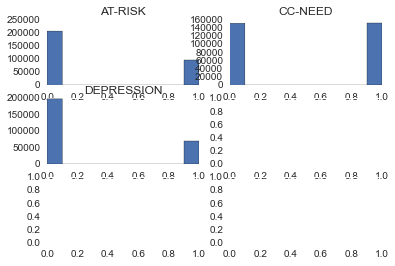

In [23]:
profile.hist();

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def convert_labels(data):
    for col_name in data.columns:
        col = data[col_name]
        if col.dtype == 'O':
            labels = col.unique()
            le.fit(labels)
            data[col_name] = le.transform(col)
    return data

In [ ]:
profiles_converted = convert_labels(profile.dropna())

In [ ]:
profiles_converted.head()

*Make NEEDS table: (1) roll-up additional health questions that remain: ADLs (Activities of Daily Living), etc.

In [26]:
#list was somewhat cherry picked so come back to left out vars.
# needs = data.loc[:,['SCLACT', 'DIFBTH', 'DIFDRS', 'DIFEAT', 'DIFCHR', 'DIFWLK', 'DIFTOL', 'DIFPRM', 'DIFMON', 'DIFMED', 'BLIND', 'DEAF', 'DIFCON', 'DIFERR', 'MEMINT', 'PNIACT']]

emotional = (data.loc[:, ['FELTNP', 'FELTSD']]).replace({1:False, 2:True, 3:True, 4:True})
pain = data['PNIACT'].replace({1:False, 2:True, 3:True, 4:True, 5:True})
social = data['SCLACT'].replace({1:True, 2:True, 3:True, 4:True, 5:False})
adl_1 = data.loc[:, ['DIFBTH', 'DIFDRS', 'DIFEAT', 'DIFCHR', 'DIFWLK', 'DIFTOL', 'DIFPRM', 'DIFMON', 'DIFMED']].replace({1:False, 2:True, 3:True})
adl_2 = data.loc[:, ['BLIND', 'DEAF', 'DIFCON', 'DIFERR']].replace({1:True, 2:False})
needs = pd.concat([emotional, pain, social, adl_1, adl_2], axis=1)

In [27]:
needs.head()

,FELTNP,FELTSD,PNIACT,SCLACT,DIFBTH,DIFDRS,DIFEAT,DIFCHR,DIFWLK,DIFTOL,DIFPRM,DIFMON,DIFMED,BLIND,DEAF,DIFCON,DIFERR
ID,,,,,,,,,,,,,,,,,
C01000060,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0
C01000361,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
C01000455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C01000542,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1
C01000633,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,1


*Make WELLNESS table: (1) roll-up 8 questions into 6 health domains.

In [28]:
data.columns

Index([u'AGEGRP', u'RACE', u'GENDER', u'MRSTAT', u'EDUC', u'BMI', u'GENHTH', u'MODACT', u'CLMBSV', u'PACMPL', u'PLMTKW', u'EACMPL', u'ENTCRF', u'PNINTF', u'PCEFUL', u'ENERGY', u'BLSAD', u'SCLACT', u'ASHLTH', u'ASEHLTH', u'DIFBTH', u'DIFDRS', u'DIFEAT', u'DIFCHR', u'DIFWLK', u'DIFTOL', u'DIFPRM', u'DIFMON', u'DIFMED', u'PHYHTH', u'MENHTH', u'PORHTH', u'BLIND', u'DEAF', u'DIFCON', u'DIFERR', u'MEMINT', u'HIGHBP', u'ANGCAD', u'CHF', u'AMI', u'OTHHRT', u'STROKE', u'COPD_E', u'GI_ETC', u'ATHHIP', u'ATHHAN', u'OSTEOPO', u'SCIATC', u'DIABET', u'DEPRES', u'ANYCAN', u'COLNCA', u'LUNGCA', u'BRSTCA', u'PROSCA', u'OTHCAN', u'PNIACT', u'PNISOC', u'AVGPN', u'FELTNP', u'FELTSD', u'CMPHTH', u'SMKFRQ', u'URNLKG', u'URNMAG', u'URNDOC', u'URNTRT', u'PAOTLK', u'PAOADV', u'BALTLK', u'FELL12MO', u'BAL12MO', u'FALLTLK', u'OSTTEST', u'WHOCMP', u'SRVDSP', u'RNDNUM', u'PCTCMP', u'COHORT', u'PLREG', u'SVLANG', u'MCC', u'AT-RISK', u'CC-NEED'], dtype='object')

In [42]:
wellness = data.loc[:,['PNINTF', 'GENHTH', 'ENERGY', 'SCLACT']]
#calc new cols
wellness['Physical Functioning'] = ((3 - data['MODACT']) + (3 - data['CLMBSV']))/2
wellness['Role Physical'] = (data['PACMPL'] + data['PLMTKW'])/2
wellness['Role Emotional'] = (data['EACMPL'] + data['ENTCRF'])/2
#reorder responses so that biggest gaps/needs are ascending ordered
wellness['Mental Health'] = (data['PCEFUL'] + (6 - data['BLSAD']))/2
wellness['SCLACT'] = (5 - wellness['SCLACT'])

wellness.head()

,PNINTF,GENHTH,ENERGY,SCLACT,Physical Functioning,Role Physical,Role Emotional,Mental Health
ID,,,,,,,,
C01000060,3,4,5,1,2.0,4.0,3,2.5
C01000361,2,3,4,0,0.5,1.5,1,1.0
C01000455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C01000542,2,3,6,1,2.0,2.5,1,1.0
C01000633,5,5,6,3,0.0,5.0,5,4.0


In [36]:
#reorder cols + renames
new_col_names = {
 'Physical Functioning':'Physical Functioning',
 'Role Physical':'Role Physical',
 'PNINTF': 'Bodily Pain',
 'GENHTH': 'General Health',
 'ENERGY': 'Vitality',
 'SCLACT':'Social Functioning',
 'Role Emotional':'Role Emotional',
 'Mental Health':'Mental Health'
 }
wellness = wellness.rename(columns = new_col_names)

#scale

In [37]:
wellness.head()

,Bodily Pain,General Health,Vitality,Social Functioning,Physical Functioning,Role Physical,Role Emotional,Mental Health
ID,,,,,,,,
C01000060,3,4,5,4,1.0,4.0,3,4.5
C01000361,2,3,4,5,2.5,1.5,1,4.0
C01000455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C01000542,2,3,6,4,1.0,2.5,1,4.0
C01000633,5,5,6,2,3.0,5.0,5,4.0


*Checking for profile (survey) completeness*

In [2]:
# profiles['PCTCMP'].describe()

In [3]:
# profiles.count().plot(kind='bar', figsize=(14, 2.5))

# 2 - EXPLORE

###Quality Control (Transform)

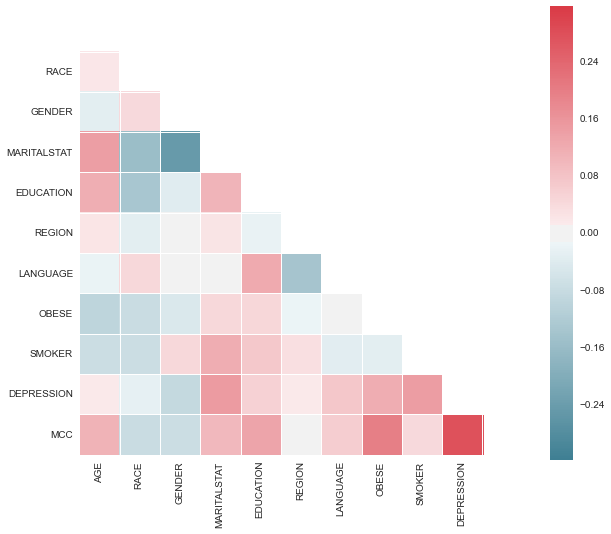

In [94]:
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(profiles_converted, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

In [ ]:
#@David
#missing data
#data completeness
#data quality

In [ ]:
#transformation code

In [11]:
# profiles_simple = profiles_simple.dropna()
# profiles_simple.head()

*Distribution of Data Points*